In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
%matplotlib inline

### Reading the dataset

In [2]:
# Reading CSV
cancer_df = pd.read_csv('./data/cancer.csv', sep = ',')

In [3]:
# Deleting unused column
del cancer_df['Unnamed: 32']

In [4]:
cancer_df.shape

(569, 32)

In [5]:
cancer_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Splitting train and test datasets

In [7]:
# Selecting features to train the model
features = cancer_df.columns.tolist()[2:]

In [8]:
# Creating feature matrix
X = cancer_df[features]

In [9]:
# Creating target
Y = cancer_df['diagnosis'].replace({'B': 0, 'M': 1})

In [10]:
pd.Series(Y).value_counts(normalize = True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [11]:
# Splitting feature matrix for training (70%) and test (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y)

In [12]:
pd.Series(Y_train).value_counts(normalize = True)

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [13]:
pd.Series(Y_test).value_counts(normalize = True)

0    0.625731
1    0.374269
Name: diagnosis, dtype: float64

### Training the model

In [14]:
# Initializing the model
model = DecisionTreeClassifier()

In [15]:
# Training the model using training dataset
model.fit(X_train, Y_train)

DecisionTreeClassifier()

[Text(1139.431640625, 1032.8400000000001, 'concave points_worst <= 0.142\ngini = 0.467\nsamples = 398\nvalue = [250, 148]\nclass = B'),
 Text(866.42578125, 924.1200000000001, 'area_worst <= 929.8\ngini = 0.159\nsamples = 265\nvalue = [242, 23]\nclass = B'),
 Text(686.6015625, 815.4000000000001, 'radius_se <= 0.973\ngini = 0.063\nsamples = 247\nvalue = [239, 8]\nclass = B'),
 Text(634.2890625, 706.6800000000001, 'area_worst <= 871.8\ngini = 0.055\nsamples = 246\nvalue = [239, 7]\nclass = B'),
 Text(483.890625, 597.96, 'concave points_worst <= 0.136\ngini = 0.041\nsamples = 241\nvalue = [236, 5]\nclass = B'),
 Text(340.03125, 489.24, 'radius_se <= 0.643\ngini = 0.026\nsamples = 232\nvalue = [229, 3]\nclass = B'),
 Text(209.25, 380.5200000000001, 'smoothness_se <= 0.003\ngini = 0.017\nsamples = 229\nvalue = [227, 2]\nclass = B'),
 Text(104.625, 271.80000000000007, 'fractal_dimension_se <= 0.001\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = B'),
 Text(52.3125, 163.08000000000004, 'gi

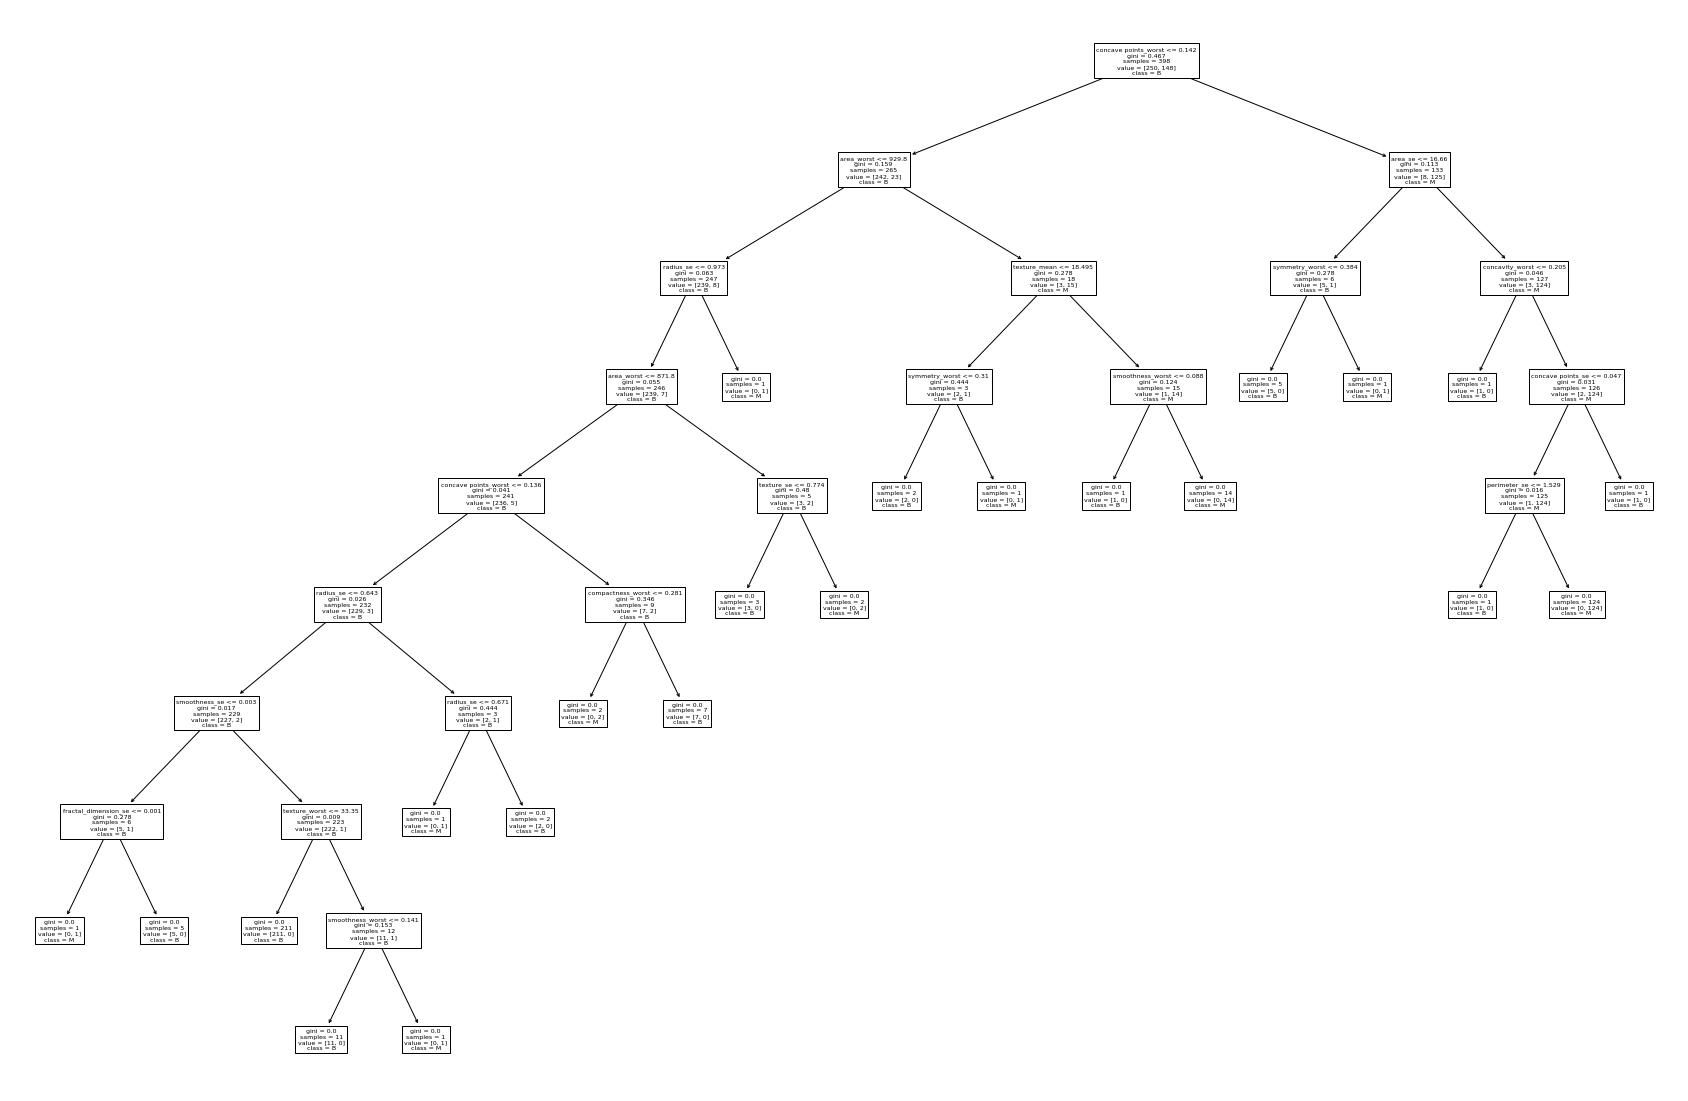

In [16]:
# Plotting the tree model
plt.figure(figsize = (30, 20))
plot_tree(model, feature_names = features, class_names = ['B', 'M'])

### Evaluating the model

In [17]:
# Predicting for test dataset
predictions = model.predict(X_test)

In [18]:
# Plotting confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, predictions)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

In [ ]:
# Calculating confusion matrix derived metrics
print('Precision:', precision_score(Y_test, predictions))
print('Recall:', recall_score(Y_test, predictions))
print('F1:', f1_score(Y_test, predictions))

Precision: 0.855072463768116
Recall: 0.921875
F1: 0.887218045112782
